In [ ]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=34b3a43ef40453351c5cf123860fbe31cdab464d8fafa947c114889da76a5a0c
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
!pip install -q findspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()

In [ ]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



**Create Database**

In [ ]:
spark.sql("CREATE DATABASE BostonHouse")

DataFrame[]

In [ ]:
spark.sql("show databases").show()

+-----------+
|  namespace|
+-----------+
|bostonhouse|
|    default|
+-----------+



**Load Data to Spark Cluster**

In [ ]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

**Save dataset to a new table in Hive**

In [ ]:
dataset.write.mode("overwrite").saveAsTable("bostonhouse.boston_housing")

**Task 1: Data Overview**

In [ ]:
# Top 5 rows from table
spark.sql("select * from bostonhouse.boston_housing").show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
# Check Total_Records
spark.sql("select count(*) as Total_Records from bostonhouse.boston_housing").show()

+-------------+
|Total_Records|
+-------------+
|          506|
+-------------+



**Task 2: Descriptive Statistics**

In [ ]:
# Basic statistics (mean, standard deviation, min, max) for the "medv" (median home value) column.
query = """
SELECT
    AVG(medv) AS mean_of_medv,
    STDDEV(medv) AS std_dev_of_medv,
    MIN(medv) AS min_of_medv,
    MAX(medv) AS max_of_medv
FROM
    bostonhouse.boston_housing
    """
spark.sql(query).show()

+------------------+-----------------+-----------+-----------+
|      mean_of_medv|  std_dev_of_medv|min_of_medv|max_of_medv|
+------------------+-----------------+-----------+-----------+
|22.532806324110698|9.197104087379815|        5.0|       50.0|
+------------------+-----------------+-----------+-----------+



In [ ]:
#The mean "rm" (average number of rooms per dwelling).
query = """
SELECT
    AVG(rm) AS mean_of_rm
FROM
    bostonhouse.boston_housing
    """
spark.sql(query).show()

+-----------------+
|       mean_of_rm|
+-----------------+
|6.284634387351787|
+-----------------+



**Task 3: Data Exploration**

In [ ]:
# Property with the highest crime rate ("crim"). Provide details about this property.
query = """
SELECT
    *
FROM
    bostonhouse.boston_housing
WHERE
    crim = (
        SELECT
            MAX(crim)
        FROM
            bostonhouse.boston_housing
    )
"""
spark.sql(query).show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [ ]:
#Property with the lowest median home value ("medv"). Include its details.
query = """
SELECT
    *
FROM
    bostonhouse.boston_housing
WHERE
    medv = (
        SELECT
            MIN(medv)
        FROM
            bostonhouse.boston_housing
    )
"""
spark.sql(query).show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2| 396.9|30.59| 5.0|
|67.9208|0.0| 18.1|   0|0.693|5.683|100.0|1.4254| 24|666|   20.2|384.97|22.98| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+



**Task 4: Data Distribution Analysis**

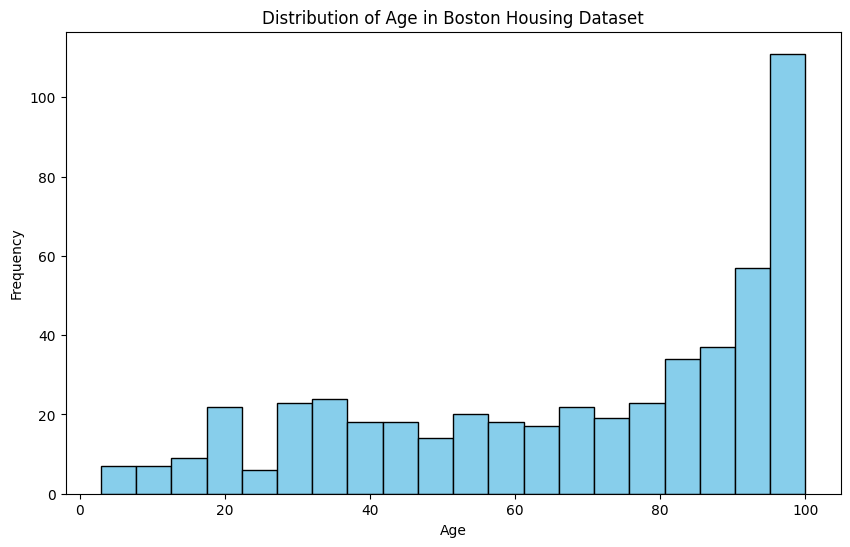

In [ ]:
import matplotlib.pyplot as plt
df = spark.table("bostonhouse.boston_housing")


age_values = df.select("age").rdd.flatMap(lambda x: x).collect()


plt.figure(figsize=(10, 6))
plt.hist(age_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age in Boston Housing Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate and report the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River)
query ="""
    SELECT
        (COUNT(*) FILTER (WHERE chas = 1) / COUNT(*)) * 100 AS percentage_with_chas_1
    FROM
        bostonhouse.boston_housing
"""

spark.sql(query).show()

+----------------------+
|percentage_with_chas_1|
+----------------------+
|      6.91699604743083|
+----------------------+



**Task 5: Correlation Analysis**

In [ ]:
#The correlation coefficient between "rm" and "medv." The relationship between the average number of rooms and median home value.
query = """
SELECT
    CORR(rm, medv) AS correlation_coefficient
FROM
    bostonhouse.boston_housing
"""
spark.sql(query).show()

if float(spark.sql(query).collect()[0][0]) > 0:
    print("The relationship between the average number of rooms and median home value is positive.")
if float(spark.sql(query).collect()[0][0]) < 0:
    print("The relationship between the average number of rooms and median home value is negative.")


+-----------------------+
|correlation_coefficient|
+-----------------------+
|     0.6953599470715401|
+-----------------------+

The relationship between the average number of rooms and median home value is positive.


In [ ]:
# Investigate if there is any correlation between "ptratio" (pupil-teacher ratio) and "nox" (nitrogen oxide concentration). Report your findings.
query = """
SELECT
    CORR(ptratio, nox) AS correlation_coefficient
FROM
    bostonhouse.boston_housing
"""
spark.sql(query).show()

if float(spark.sql(query).collect()[0][0]) > 0:
    print("There is a positive correlation between pupil-teacher ratio and nitrogen oxide concentration.")
if float(spark.sql(query).collect()[0][0]) < 0:
    print("There is a negative correlation between pupil-teacher ratio and nitrogen oxide concentration.")

+-----------------------+
|correlation_coefficient|
+-----------------------+
|    0.18893267711276893|
+-----------------------+

There is a positive correlation between pupil-teacher ratio and nitrogen oxide concentration.


**Task 6: Advanced Querying**

In [ ]:
# The top 5 neighborhoods with the highest median home values ("medv")
query = """
SELECT *
FROM bostonhouse.boston_housing
ORDER BY medv DESC
LIMIT 5
"""


spark.sql(query).show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [ ]:
#The average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.

query = """
SELECT
    chas,
    AVG(age) AS avg_age
FROM
    bostonhouse.boston_housing
GROUP BY
    chas
"""
spark.sql(query).show()


+----+-----------------+
|chas|          avg_age|
+----+-----------------+
|   1|77.50000000000001|
|   0|67.91167728237794|
+----+-----------------+



**Task 7: Visualization**

In [ ]:
#. Create a Hive view named "property_age_view" that includes the "age" and "medv" columns.

create_view_query = """
CREATE VIEW IF NOT EXISTS property_age_view AS
SELECT age, medv
FROM bostonhouse.boston_housing
"""
spark.sql(create_view_query)



DataFrame[]

In [ ]:
query = "SELECT * FROM property_age_view"
property_age_view_df = spark.sql(query)
property_age_view_df.show()

+-----+----+
|  age|medv|
+-----+----+
| 65.2|24.0|
| 78.9|21.6|
| 61.1|34.7|
| 45.8|33.4|
| 54.2|36.2|
| 58.7|28.7|
| 66.6|22.9|
| 96.1|27.1|
|100.0|16.5|
| 85.9|18.9|
| 94.3|15.0|
| 82.9|18.9|
| 39.0|21.7|
| 61.8|20.4|
| 84.5|18.2|
| 56.5|19.9|
| 29.3|23.1|
| 81.7|17.5|
| 36.6|20.2|
| 69.5|18.2|
+-----+----+
only showing top 20 rows



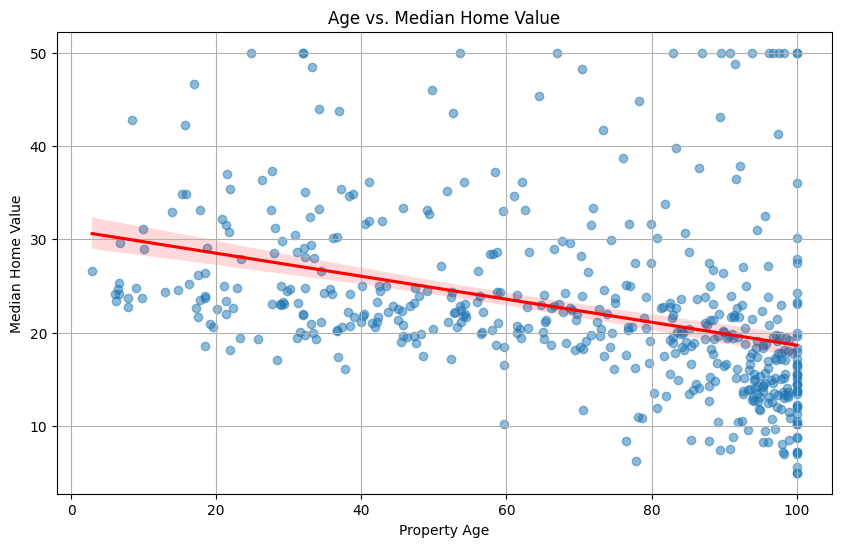

In [ ]:
import seaborn as sns

query = """
SELECT age, medv
FROM property_age_view
"""

property_age_df = spark.sql(query)

property_age_pandas_df = property_age_df.toPandas()

plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='medv', data=property_age_pandas_df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Age vs. Median Home Value')
plt.xlabel('Property Age')
plt.ylabel('Median Home Value')
plt.grid(True)
plt.show()

**Task 8: Outliers Detection**

In [ ]:
# Write a query to identify and report properties with a "crim" value greater than 10
query = """
SELECT *
FROM bostonhouse.boston_housing
WHERE crim > 10
"""
spark.sql(query).show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

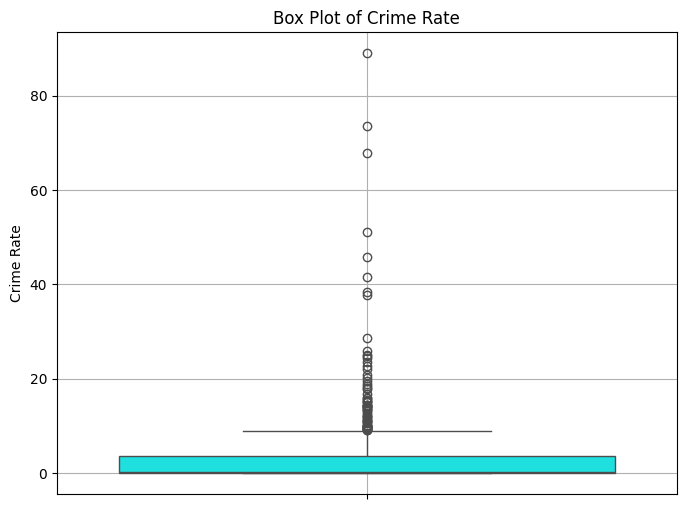

In [ ]:
# Box Plot for identifying outliers
query = """
SELECT crim
FROM bostonhouse.boston_housing
"""

crime_rate_df = spark.sql(query)

crime_rate_pandas_df = crime_rate_df.toPandas()

plt.figure(figsize=(8, 6))
sns.boxplot(y='crim', data=crime_rate_pandas_df, orient='v', color='cyan')
plt.title('Box Plot of Crime Rate')
plt.ylabel('Crime Rate')
plt.grid(True)
plt.show()

In [ ]:
# Task 9: Hypothesis Testing

# Null Hypothesis (H₀): There is no statistically significant relationship between the average number of rooms ("rm") and the median home value ("medv").

# Alternative Hypothesis (H₁): There is a statistically significant relationship between the average number of rooms ("rm") and the median home value ("medv").

# Significance Level (α): 0.05


In [ ]:
query = """
SELECT
    corr(rm, medv) AS correlation_coefficient,
    count(*) AS sample_size
FROM
    bostonhouse.boston_housing
"""

correlation_coefficient = spark.sql(query).collect()[0][0]

alpha = 0.05

if abs(correlation_coefficient) > 0 and abs(correlation_coefficient) < alpha:
    print(f"There is a statistically significant relationship (p-value < {alpha}) between 'rm' and 'medv'.")
    print("Reject the null hypothesis.")
else:
    print(f"There is no statistically significant relationship (p-value >= {alpha}) between 'rm' and 'medv'.")
    print("Fail to reject the null hypothesis.")

+-----------------------+-----------+
|correlation_coefficient|sample_size|
+-----------------------+-----------+
|     0.6953599470715401|        506|
+-----------------------+-----------+

There is no statistically significant relationship (p-value >= 0.05) between 'rm' and 'medv'.
Fail to reject the null hypothesis.
